Carry out a hypothesis test for “mean” of a population. The population standard deviation is 13.46, and the test is for a “mean” different from 60. Given: a sample size of 30, with “sample mean” 65.10. Consider alpha = 0.05. Demonstrate your solution using either the critical-value or p-value method.

Null hypothesis : Ho : mu = 60

Alternate hypothesis : Ha : mu != 60

In [1]:
import numpy as np
import scipy.stats as st

In [2]:
n = 30
xbar = 65.10
mu = 60
sigma = 13.46
alpha = 0.05

In [3]:
z_critical = st.norm.ppf(1-(alpha/2))
z_critical

1.959963984540054

In [4]:
z = (xbar-mu)/(sigma/np.sqrt(n))
z

2.075323211943792

In [5]:
if (z < z_critical) and (z > -z_critical): 
    print("Null hypothesis cannot be rejected")
else:
    print("Reject null hypothesis")

Reject null hypothesis


Mendel’s hypothesis: plants should bear purple or white flowers at random, in the ratio 3:1. i.e., For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.
• Mendel’s experiment: Mendel recorded the number of purple and white flowering plants. Among the 929 plants that he grew, assume (705 + “last 2 digits of your Roll Number”), were purple flowering.
• Hypothesis Test: Carry out a hypothesis test to ascertain Mendel's model.
Specific Requirements:
1. State the Null and Alternative Hypothesis (2).
2. What statistic do you recommend to apply for this case(2)?
3. State the observed statistic(2)
4. Simulate the test statistic under the Null that will help make the decision(5). The number of simulations should be equal to (2000 - “Last 3 digits of your Roll Number”).
5. Draw a histogram to depict what the model of random selection predicts about the statistic.(4). Depict the observed statistic as a red dot on the histogram(1).
6. What is the outcome of your analysis? (1)



PART A

1) State the Null and Alternative Hypothesis.

Null Hypothesis. For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

Alternative Hypothesis. Mendel's model isn't valid.



2) What statistic do you recommend to apply for this case

Test Statistic. Since the model predicts 75% purple-flowering plants, a relevant statistic is the difference between 0.75 and the observed proportion of purple-flowering plants.


3) State the observed statistic

Total plants : 929

Total number of purple flowers : 705 + 39 = 744

Total number of white flowers : 929 - 744 = 185

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [26]:
import random

flower = ['purple']*744  #705+39=744
white = ['white']*185     #929-744

flower.extend(white)

random.shuffle(flower)
flower[645:660]

['purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'white',
 'white',
 'white',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'white']

In [27]:
import pandas as pd
df = pd.DataFrame(flower,columns=['Flower'])
df

,Flower
0,purple
1,purple
2,white
3,purple
4,white
...,...
924,purple
925,purple
926,purple
927,purple


In [28]:
#number of purple flowers
purple_count = df[df["Flower"]  == 'purple'].count()
print("Purple flowers count is :")
purple_count

Purple flowers count is :


Flower    744
dtype: int64

In [29]:
#number of white flowers
purple_count = df[df["Flower"]  == 'white'].count()
print("Purple flowers count is :")
purple_count

Purple flowers count is :


Flower    185
dtype: int64

In [30]:
total_flowers = df["Flower"].count()
print("Total Flower count :", total_flowers)

Total Flower count : 929


In [31]:
obs_prop = purple_count/total_flowers
obs_prop

Flower    0.199139
dtype: float64

In [32]:
obs_stat = abs(obs_prop - 0.75)
obs_stat

Flower    0.550861
dtype: float64

In [33]:
# New model to simulate the sample
sample = ['purple', 'purple', 'purple', 'white']
ns = np.random.choice(sample, total_flowers)

In [34]:
prop_purple = np.count_nonzero(ns == 'purple')/total_flowers
print("Proportion of purple-flowers in the new sample which differs from 0.75 is", abs(prop_purple - 0.75))

Proportion of purple-flowers in the new sample which differs from 0.75 is 0.02448869752421956


In [39]:
import numpy.random as npr

simul = 1761 #2000-239

for i in range(simul):
    s = npr.binomial(total_flowers, 0.75, simul)
    
s

array([701, 716, 702, ..., 684, 702, 693])

In [40]:
df1 = pd.DataFrame(s, columns =['Count'])

df1['sampled_stats']= (df1['Count'] / total_flowers)
df1 = df1.set_index('Count')
df1['Distance from 0.75'] = abs(df1['sampled_stats'] - 0.75)

df1.head()

,sampled_stats,Distance from 0.75
Count,,
701,0.754575,0.004575
716,0.770721,0.020721
702,0.755651,0.005651
682,0.734123,0.015877
678,0.729817,0.020183


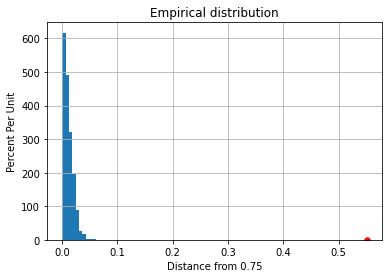

In [44]:
#plotting histogram

import matplotlib.pyplot as plt

plt.figure()
plt.hist(df1['Distance from 0.75'])
plt.scatter(obs_stat, 0, color='red', s=30)
plt.title('Empirical distribution')
plt.xlabel('Distance from 0.75')
plt.ylabel('Percent Per Unit')
plt.grid()
plt.show()

Conclusion : The observed value of the statistic, based on Mendel's data, is  0.550861 where we drew a red line that is away from the distribution we got on the right side.

So we have enough evidence to prove that Mendel's model is not valid, so we REJECT THE NULL HYPOTHESIS